In [0]:
# 1. Achieve 99.2 Validation Accuracy while using less than 18000 Parameters.
import keras

In [0]:

import numpy as np

from keras.models import Sequential
from keras.layers import  Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import tensorflow as tf
from keras.datasets import mnist

In [0]:

%matplotlib inline
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

from keras.optimizers import Adam, SGD

from keras.layers import Conv2D, MaxPooling2D,Flatten, Activation
from keras.preprocessing.image import ImageDataGenerator

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

(60000, 28, 28)


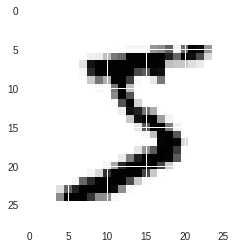

In [47]:
print (x_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(x_train[0])

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28,1)
x_test = x_test.reshape(x_test.shape[0], 28, 28,1)

In [0]:
#

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')



In [0]:
x_train /= 255
x_test /= 255

In [52]:

y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
def augment_data(dataset, dataset_labels, augementation_factor=1, use_random_rotation=True, use_random_shear=True, use_random_shift=True, use_random_zoom=True):
	augmented_image = []
	augmented_image_labels = []

	for num in range (0, dataset.shape[0]):

		for i in range(0, augementation_factor):
			# original image:
			augmented_image.append(dataset[num])
			augmented_image_labels.append(dataset_labels[num])

			if use_random_rotation:
				augmented_image.append(tf.contrib.keras.preprocessing.image.random_rotation(dataset[num], 20, row_axis=0, col_axis=1, channel_axis=2))
				augmented_image_labels.append(dataset_labels[num])

			if use_random_shear:
				augmented_image.append(tf.contrib.keras.preprocessing.image.random_shear(dataset[num], 0.2, row_axis=0, col_axis=1, channel_axis=2))
				augmented_image_labels.append(dataset_labels[num])

			if use_random_shift:
				augmented_image.append(tf.contrib.keras.preprocessing.image.random_shift(dataset[num], 0.2, 0.2, row_axis=0, col_axis=1, channel_axis=2))
				augmented_image_labels.append(dataset_labels[num])

			if use_random_zoom:
				augmented_image.append(tf.contrib.keras.preprocessing.image.random_zoom(dataset[num], (0.8,1.2), row_axis=0, col_axis=1, channel_axis=2))
				augmented_image_labels.append(dataset_labels[num])

	return np.array(augmented_image), np.array(augmented_image_labels)

x_train , y_train= augment_data(x_train, y_train,  augementation_factor=1, use_random_rotation=True, use_random_shear=True, use_random_shift=True)

In [0]:
from sklearn.utils import shuffle

x_train , y_train= shuffle(x_train , y_train)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [56]:
y_train[:10]


array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [68]:
from keras.layers import Activation
from keras.layers import MaxPooling2D

from keras.layers import DepthwiseConv2D

from keras.layers import SeparableConv2D

from keras import regularizers



model = Sequential()
model.add(Convolution2D(16,3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(32,3,3,activation='relu'))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
model.add(Convolution2D(32,3,3,activation='relu'))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10,10))
model.add(Flatten())
model.add(Activation('softmax'))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`


In [70]:

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 26, 26, 10)        170       
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 24, 24, 32)        2912      
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 24, 24, 10)        330       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 12, 12, 10)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 10, 10, 32)        2912      
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 10, 10, 10)        330       
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [72]:
model.fit(x_train , y_train, batch_size=300, nb_epoch=50, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/50
300000/300000 [==============================] - 57s 189us/step - loss: 0.3501 - acc: 0.8973
Epoch 2/50
300000/300000 [==============================] - 55s 182us/step - loss: 0.1247 - acc: 0.9621
Epoch 3/50
300000/300000 [==============================] - 55s 184us/step - loss: 0.0910 - acc: 0.9727
Epoch 4/50
300000/300000 [==============================] - 55s 184us/step - loss: 0.0768 - acc: 0.9764
Epoch 5/50
300000/300000 [==============================] - 55s 184us/step - loss: 0.0660 - acc: 0.9799
Epoch 6/50
300000/300000 [==============================] - 55s 184us/step - loss: 0.0592 - acc: 0.9818
Epoch 7/50
300000/300000 [==============================] - 55s 184us/step - loss: 0.0535 - acc: 0.9835
Epoch 8/50
300000/300000 [==============================] - 55s 183us/step - loss: 0.0489 - acc: 0.9846
Epoch 9/50
300000/300000 [==============================] - 56s 185us/step - loss: 0.0452 - acc: 0.9860
Epoch 10/50
300000/300000 [==============================] - 55s

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)

In [74]:
print(score)

[0.0284918041888232, 0.9935]
